# CIFAR-10 dataset

- Number of instances: 60000
- Data size: 32 x 32 x 3
- Data granularity: from 0 to 255 for 3 channels

### Import package, dataset

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras import layers, models

cifar10 = keras.datasets.cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

170498071/170498071 [==============================] - 5s 0us/step
(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


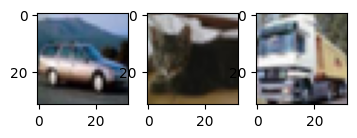

In [2]:
plt.figure(figsize=(4, 4))

plt.subplot(2,3,1)
plt.imshow(x_train[4])

plt.subplot(2,3,2)
plt.imshow(x_train[9])

plt.subplot(2,3,3)
plt.imshow(x_train[1])

### Data preprocessing

In [3]:
from sklearn.preprocessing import LabelBinarizer

x_train_scaled = x_train/255.0
x_test_scaled = x_test/255.0

encoder = LabelBinarizer()
y_train_onehot = encoder.fit_transform(y_train)
y_test_onehot = encoder.fit_transform(y_test)

## Transfer model

- with pretrained ResNet50 model
- with own freezing point / FC layers

In [4]:
from keras.applications import ResNet50

base_model = ResNet50(input_shape=(32, 32, 3), include_top=False, weights='imagenet')
base_model.trainable = False
base_model.summary()

94765736/94765736 [==============================] - 1s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 38, 38, 3)    0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 16, 16, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 16, 16, 64)   256         ['conv1_conv[0][0]']             
                          

In [5]:
transfer_model = models.Sequential()
transfer_model.add(base_model)
transfer_model.add(layers.Flatten())
transfer_model.add(layers.Dense(256, activation='relu'))
transfer_model.add(layers.Dense(10, activation='softmax'))

transfer_model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])
transfer_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 1, 1, 2048)        23587712  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 256)               524544    
                                                                 
 dense_1 (Dense)             (None, 10)                2570      
                                                                 
Total params: 24,114,826
Trainable params: 527,114
Non-trainable params: 23,587,712
_________________________________________________________________


In [6]:
# transfer_model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])
# transfer_model.summary()

In [7]:
cifar10 = keras.datasets.cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train_scaled = x_train/255.0
x_test_scaled = x_test/255.0

encoder = LabelBinarizer()
y_train_onehot = encoder.fit_transform(y_train)
y_test_onhot = encoder.fit_transform(y_test)

In [8]:
history = transfer_model.fit(x_train_scaled, y_train_onehot,
                             validation_data=[x_test_scaled, y_test_onehot], epochs=200)

Epoch 1/200
1563/1563 [==============================] - 38s 14ms/step - loss: 2.0432 - accuracy: 0.2532 - val_loss: 1.9282 - val_accuracy: 0.3052
Epoch 2/200
1563/1563 [==============================] - 21s 13ms/step - loss: 1.8771 - accuracy: 0.3172 - val_loss: 1.8032 - val_accuracy: 0.3500
Epoch 3/200
1563/1563 [==============================] - 23s 15ms/step - loss: 1.8206 - accuracy: 0.3380 - val_loss: 1.8088 - val_accuracy: 0.3532
Epoch 4/200
1563/1563 [==============================] - 22s 14ms/step - loss: 1.7897 - accuracy: 0.3528 - val_loss: 1.7751 - val_accuracy: 0.3610
Epoch 5/200
1563/1563 [==============================] - 21s 13ms/step - loss: 1.7674 - accuracy: 0.3628 - val_loss: 1.7501 - val_accuracy: 0.3669
Epoch 6/200
1563/1563 [==============================] - 23s 15ms/step - loss: 1.7501 - accuracy: 0.3715 - val_loss: 1.7248 - val_accuracy: 0.3848
Epoch 7/200
1563/1563 [==============================] - 24s 15ms/step - loss: 1.7334 - accuracy: 0.3763 - val_loss: 1

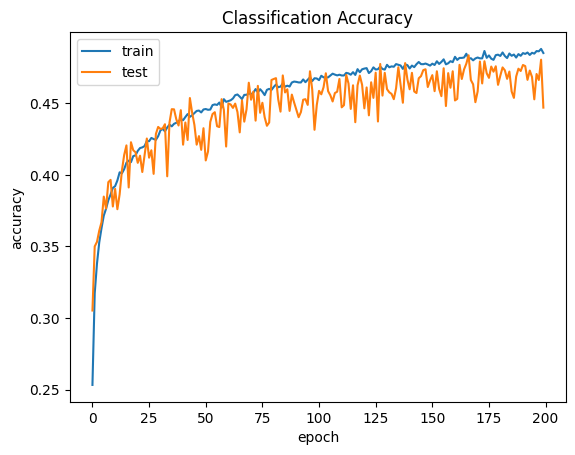

In [9]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Classification Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

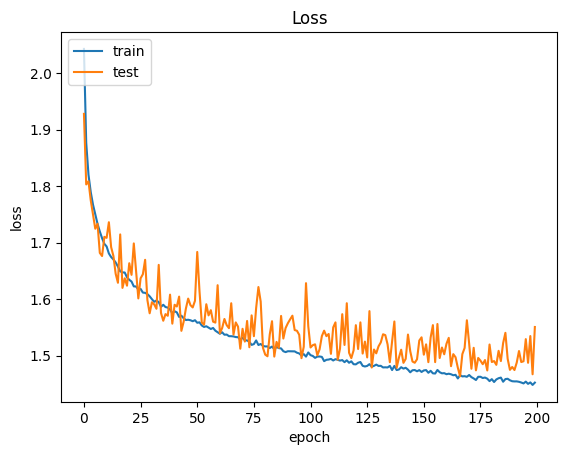

In [10]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Fine Tuning

In [ ]:
save = transfer_model.fit(x_train_scaled, y_train_onehot,
                             validation_data=[x_test_scaled, y_test_onehot], epochs=10)

Epoch 1/10
1563/1563 [==============================] - 41s 18ms/step - loss: 2.0410 - accuracy: 0.2517 - val_loss: 1.9287 - val_accuracy: 0.2839
Epoch 2/10
1563/1563 [==============================] - 28s 18ms/step - loss: 1.8813 - accuracy: 0.3139 - val_loss: 1.8877 - val_accuracy: 0.3160
Epoch 3/10
1563/1563 [==============================] - 21s 14ms/step - loss: 1.8208 - accuracy: 0.3421 - val_loss: 1.7828 - val_accuracy: 0.3663
Epoch 4/10
1563/1563 [==============================] - 20s 13ms/step - loss: 1.7863 - accuracy: 0.3549 - val_loss: 1.8217 - val_accuracy: 0.3442
Epoch 5/10
1563/1563 [==============================] - 21s 13ms/step - loss: 1.7639 - accuracy: 0.3647 - val_loss: 1.7683 - val_accuracy: 0.3614
Epoch 6/10
1563/1563 [==============================] - 21s 13ms/step - loss: 1.7424 - accuracy: 0.3733 - val_loss: 1.7755 - val_accuracy: 0.3598
Epoch 7/10
1563/1563 [==============================] - 20s 13ms/step - loss: 1.7292 - accuracy: 0.3772 - val_loss: 1.6906 -

In [ ]:
history = transfer_model.fit(x_train_scaled, y_train_onehot,
                             validation_data=[x_test_scaled, y_test_onehot],
                             initial_epoch = save.epoch[-1], epochs=50)

Epoch 10/50
1563/1563 [==============================] - 21s 14ms/step - loss: 1.6872 - accuracy: 0.3953 - val_loss: 1.6671 - val_accuracy: 0.3996
Epoch 11/50
1563/1563 [==============================] - 23s 15ms/step - loss: 1.6791 - accuracy: 0.3987 - val_loss: 1.6820 - val_accuracy: 0.4049
Epoch 12/50
1563/1563 [==============================] - 21s 13ms/step - loss: 1.6736 - accuracy: 0.4020 - val_loss: 1.6928 - val_accuracy: 0.3937
Epoch 13/50
1563/1563 [==============================] - 23s 15ms/step - loss: 1.6640 - accuracy: 0.4045 - val_loss: 1.6547 - val_accuracy: 0.4113
Epoch 14/50
1563/1563 [==============================] - 23s 15ms/step - loss: 1.6570 - accuracy: 0.4085 - val_loss: 1.6763 - val_accuracy: 0.4040
Epoch 15/50
1563/1563 [==============================] - 23s 15ms/step - loss: 1.6589 - accuracy: 0.4063 - val_loss: 1.7061 - val_accuracy: 0.3994
Epoch 16/50
1563/1563 [==============================] - 23s 15ms/step - loss: 1.6585 - accuracy: 0.4063 - val_loss: 1

In [ ]:
base_model.trainable = True		# resnet 일부 모델 동결 해제
for i in base_model.layers[:110]:
  i.trainable = False				# 174 layers 중 109 layer 까지 재동결
  
for i in base_model.layers[107:]:	# 동결이 제대로 해제되었는지 이전층부터 출력
  print(i.name, i.trainable)

transfer_model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])
transfer_model.summary()

conv4_block3_2_bn False
conv4_block3_2_relu False
conv4_block3_3_conv False
conv4_block3_3_bn True
conv4_block3_add True
conv4_block3_out True
conv4_block4_1_conv True
conv4_block4_1_bn True
conv4_block4_1_relu True
conv4_block4_2_conv True
conv4_block4_2_bn True
conv4_block4_2_relu True
conv4_block4_3_conv True
conv4_block4_3_bn True
conv4_block4_add True
conv4_block4_out True
conv4_block5_1_conv True
conv4_block5_1_bn True
conv4_block5_1_relu True
conv4_block5_2_conv True
conv4_block5_2_bn True
conv4_block5_2_relu True
conv4_block5_3_conv True
conv4_block5_3_bn True
conv4_block5_add True
conv4_block5_out True
conv4_block6_1_conv True
conv4_block6_1_bn True
conv4_block6_1_relu True
conv4_block6_2_conv True
conv4_block6_2_bn True
conv4_block6_2_relu True
conv4_block6_3_conv True
conv4_block6_3_bn True
conv4_block6_add True
conv4_block6_out True
conv5_block1_1_conv True
conv5_block1_1_bn True
conv5_block1_1_relu True
conv5_block1_2_conv True
conv5_block1_2_bn True
conv5_block1_2_relu Tr

In [ ]:
save_fine = transfer_model.fit(x_train, y_train_onehot, initial_epoch = save.epoch[-1],
                          validation_data=[x_test_scaled, y_test_onehot], epochs=50)

Epoch 10/50
1563/1563 [==============================] - 65s 30ms/step - loss: 1.5293 - accuracy: 0.5694 - val_loss: 4.0863 - val_accuracy: 0.1000
Epoch 11/50
1563/1563 [==============================] - 43s 27ms/step - loss: 1.0008 - accuracy: 0.6540 - val_loss: 3.6313 - val_accuracy: 0.1000
Epoch 12/50
1563/1563 [==============================] - 45s 29ms/step - loss: 0.8712 - accuracy: 0.7005 - val_loss: 3.6297 - val_accuracy: 0.1000
Epoch 13/50
1563/1563 [==============================] - 45s 29ms/step - loss: 0.7822 - accuracy: 0.7292 - val_loss: 4.1000 - val_accuracy: 0.1000
Epoch 14/50
1563/1563 [==============================] - 45s 29ms/step - loss: 0.7002 - accuracy: 0.7552 - val_loss: 9.1012 - val_accuracy: 0.1000
Epoch 15/50
1563/1563 [==============================] - 43s 28ms/step - loss: 0.5877 - accuracy: 0.7930 - val_loss: 8.5482 - val_accuracy: 0.1000
Epoch 16/50
1563/1563 [==============================] - 45s 29ms/step - loss: 0.5543 - accuracy: 0.8060 - val_loss: 1

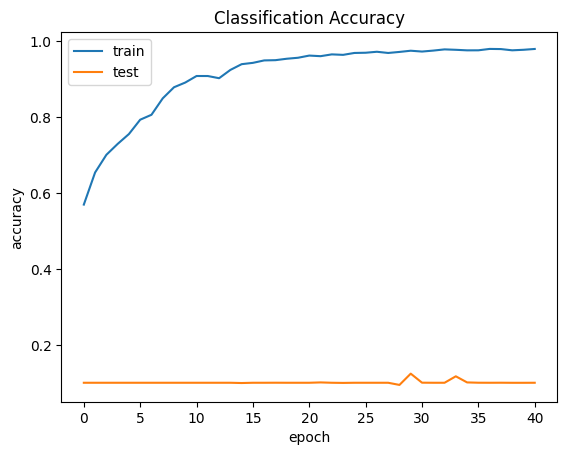

In [ ]:
plt.plot(save_fine.history['accuracy'])
plt.plot(save_fine.history['val_accuracy'])
plt.title('Classification Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

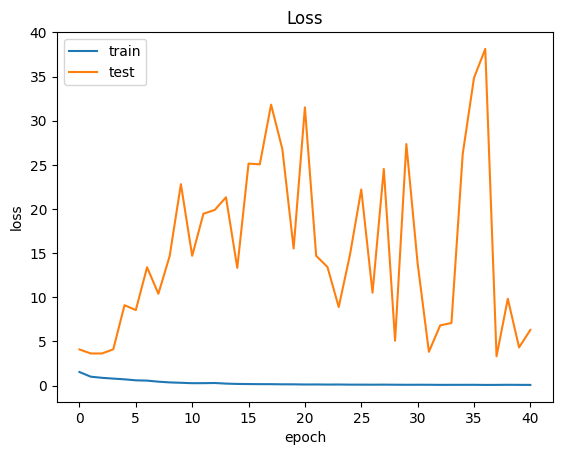

In [ ]:
plt.plot(save_fine.history['loss'])
plt.plot(save_fine.history['val_loss'])
plt.title('Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()